## Part 1 ‑ Exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm
from statsmodels.tsa import seasonal
import warnings
warnings.filterwarnings("ignore")

In [2]:
logins = pd.read_json('logins.json')

In [3]:
df = pd.DataFrame(logins)

In [4]:
df

login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]

In [5]:
df.login_time = pd.to_datetime(df.login_time)
df.index = (df.login_time)
df['login'] = 1

In [7]:
df_15 = pd.DataFrame(df.login.resample('15Min').sum())
df_15 = df_15.fillna(0)

In [23]:
rdf = df_15

In [27]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   login   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [28]:
rdf['time'] = pd.to_datetime(rdf.index)

In [30]:
rdf

login                time
login_time                                    
1970-01-01 20:00:00      2 1970-01-01 20:00:00
1970-01-01 20:15:00      6 1970-01-01 20:15:00
1970-01-01 20:30:00      9 1970-01-01 20:30:00
1970-01-01 20:45:00      7 1970-01-01 20:45:00
1970-01-01 21:00:00      1 1970-01-01 21:00:00
...                    ...                 ...
1970-04-13 17:45:00      5 1970-04-13 17:45:00
1970-04-13 18:00:00      5 1970-04-13 18:00:00
1970-04-13 18:15:00      2 1970-04-13 18:15:00
1970-04-13 18:30:00      7 1970-04-13 18:30:00
1970-04-13 18:45:00      6 1970-04-13 18:45:00

[9788 rows x 2 columns]

In [31]:
rdf['month'] = rdf.time.dt.month
rdf['day'] = rdf.time.dt.day
rdf['hour'] = rdf.time.dt.hour
rdf['week'] = rdf.time.dt.isocalendar().week
rdf['weekday'] = rdf.time.dt.weekday

In [32]:
rdf

login                time  month  day  hour  week  \
login_time                                                               
1970-01-01 20:00:00      2 1970-01-01 20:00:00      1    1    20     1   
1970-01-01 20:15:00      6 1970-01-01 20:15:00      1    1    20     1   
1970-01-01 20:30:00      9 1970-01-01 20:30:00      1    1    20     1   
1970-01-01 20:45:00      7 1970-01-01 20:45:00      1    1    20     1   
1970-01-01 21:00:00      1 1970-01-01 21:00:00      1    1    21     1   
...                    ...                 ...    ...  ...   ...   ...   
1970-04-13 17:45:00      5 1970-04-13 17:45:00      4   13    17    16   
1970-04-13 18:00:00      5 1970-04-13 18:00:00      4   13    18    16   
1970-04-13 18:15:00      2 1970-04-13 18:15:00      4   13    18    16   
1970-04-13 18:30:00      7 1970-04-13 18:30:00      4   13    18    16   
1970-04-13 18:45:00      6 1970-04-13 18:45:00      4   13    18    16   

                     weekday  
login_time                    
1970-01-01 20:00:00        3  
1970-01-01 20:15:00        3  
1970-01-01 20:30:00        3  
1970-01-01 20:45:00        3  
1970-01-01 21:00:00        3  
...                      ...  
1970-04-13 17:45:00        0  
1970-04-13 18:00:00        0  
1970-04-13 18:15:00        0  
1970-04-13 18:30:00        0  
1970-04-13 18:45:00        0  

[9788 rows x 7 columns]

In [37]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   login    9788 non-null   int64         
 1   time     9788 non-null   datetime64[ns]
 2   month    9788 non-null   int64         
 3   day      9788 non-null   int64         
 4   hour     9788 non-null   int64         
 5   week     9788 non-null   UInt32        
 6   weekday  9788 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), int64(5)
memory usage: 841.1 KB


In [41]:
rdf['week']=rdf['week'].astype(np.int64)

In [42]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   login    9788 non-null   int64         
 1   time     9788 non-null   datetime64[ns]
 2   month    9788 non-null   int64         
 3   day      9788 non-null   int64         
 4   hour     9788 non-null   int64         
 5   week     9788 non-null   int64         
 6   weekday  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 869.8 KB


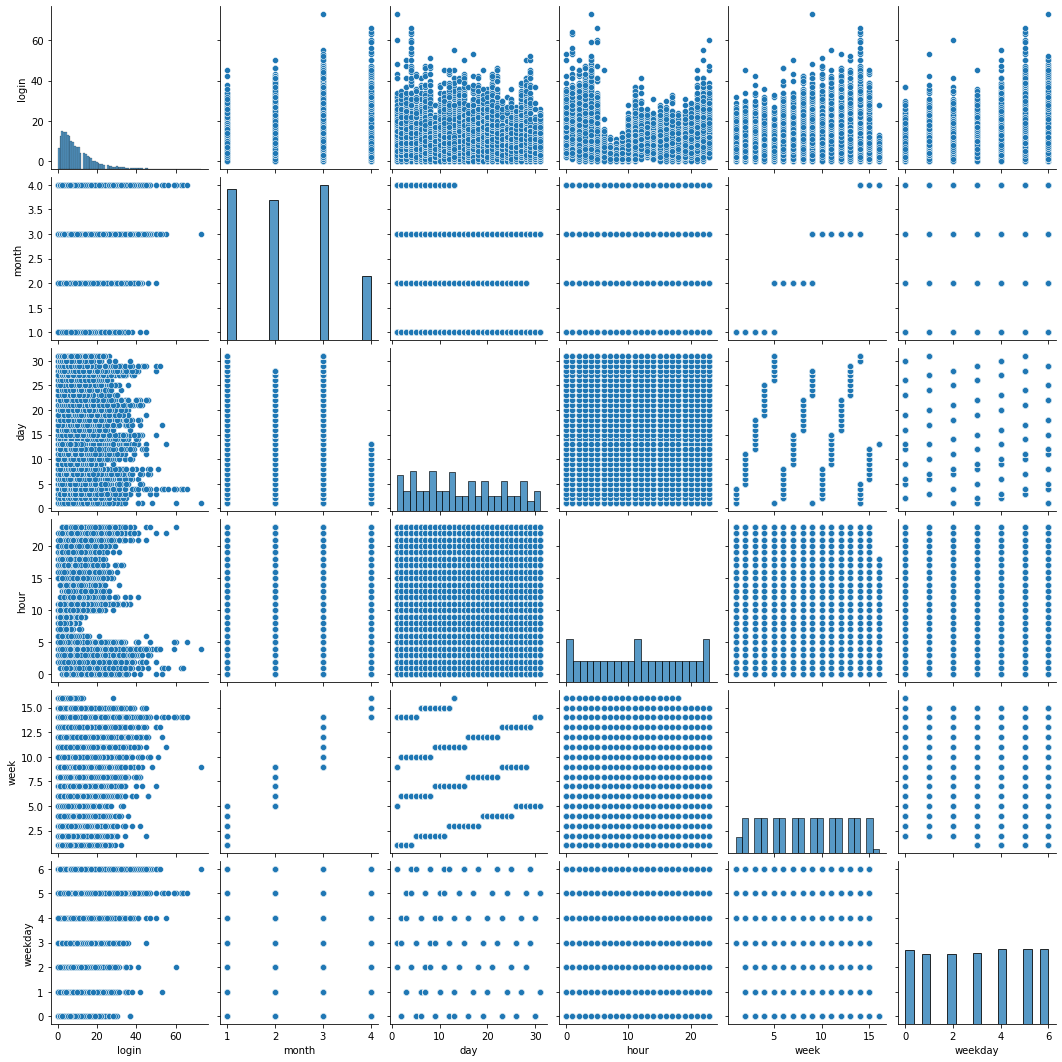

In [44]:
sns.pairplot(rdf)

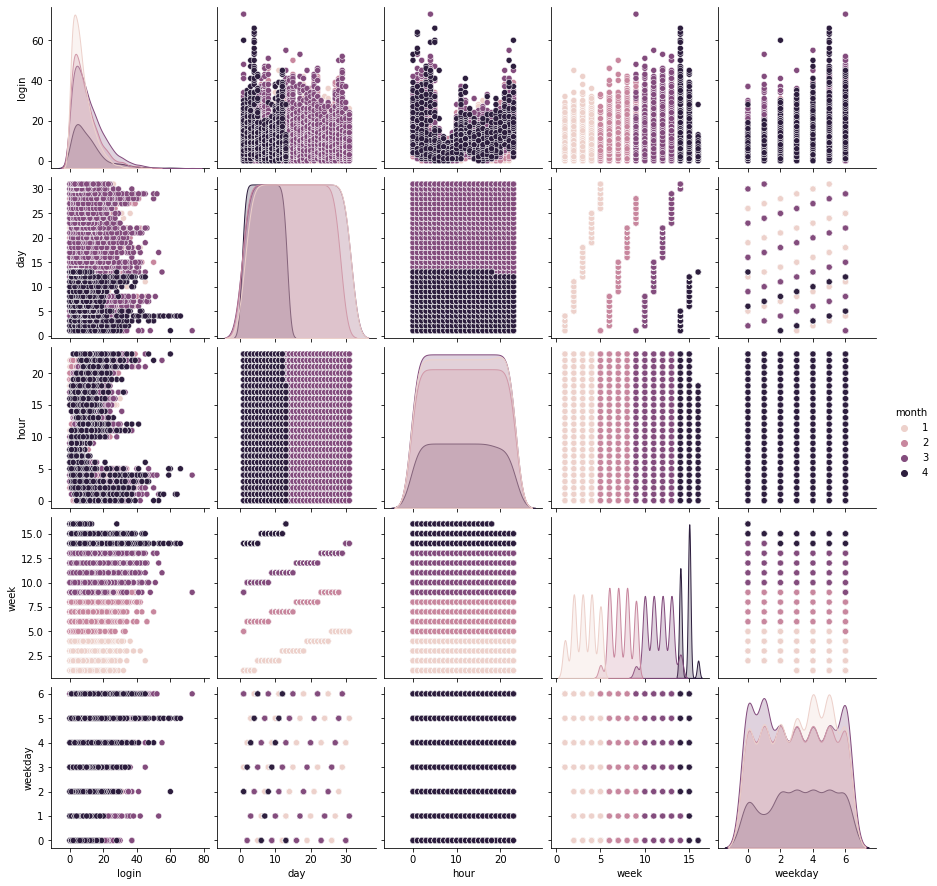

In [43]:
sns.pairplot(rdf, hue = 'month')

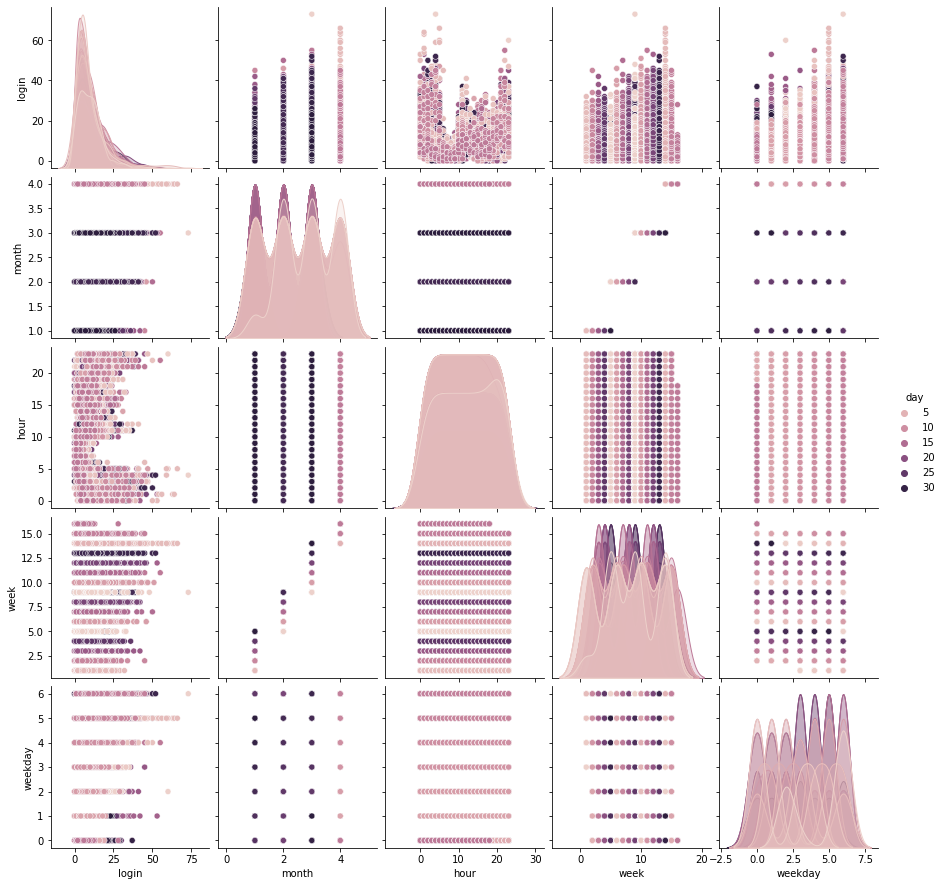

In [45]:
sns.pairplot(rdf, hue = 'day')

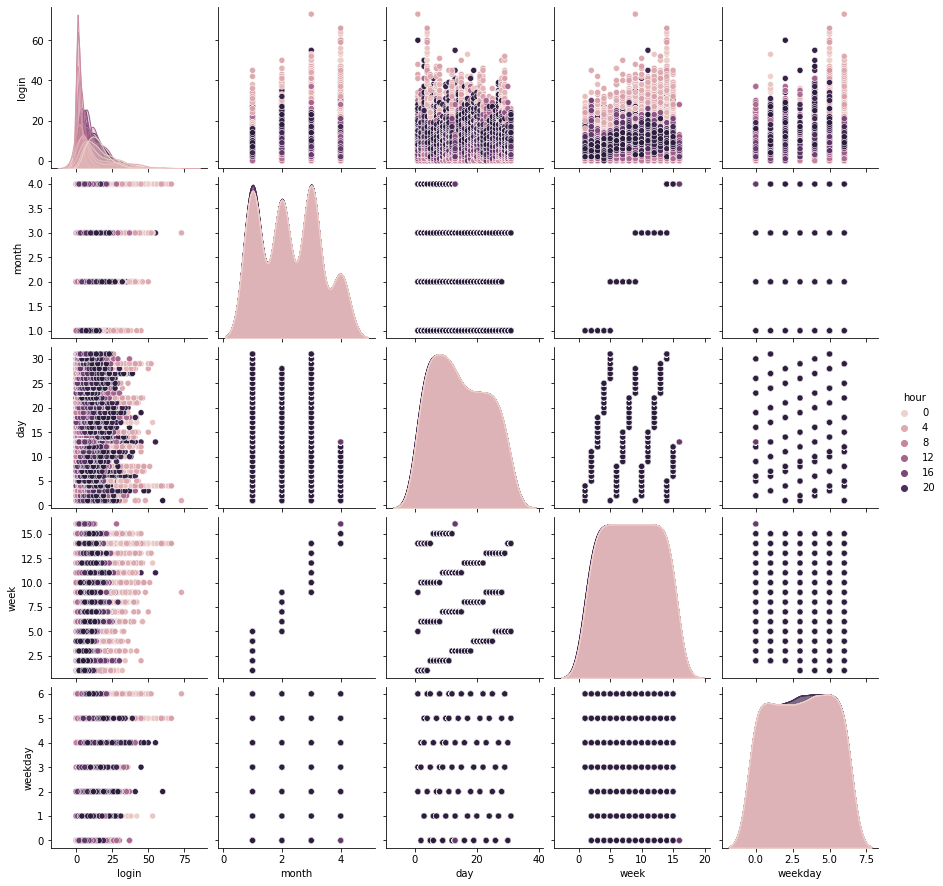

In [46]:
sns.pairplot(rdf, hue = 'hour')

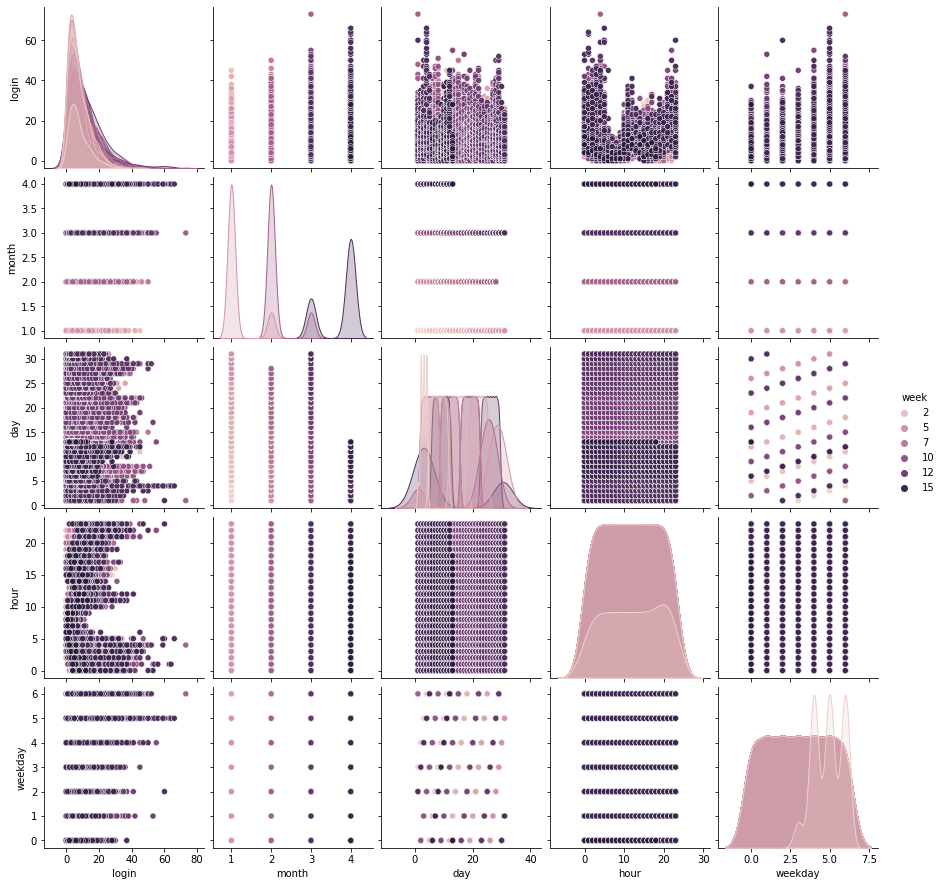

In [47]:
sns.pairplot(rdf, hue = 'week')

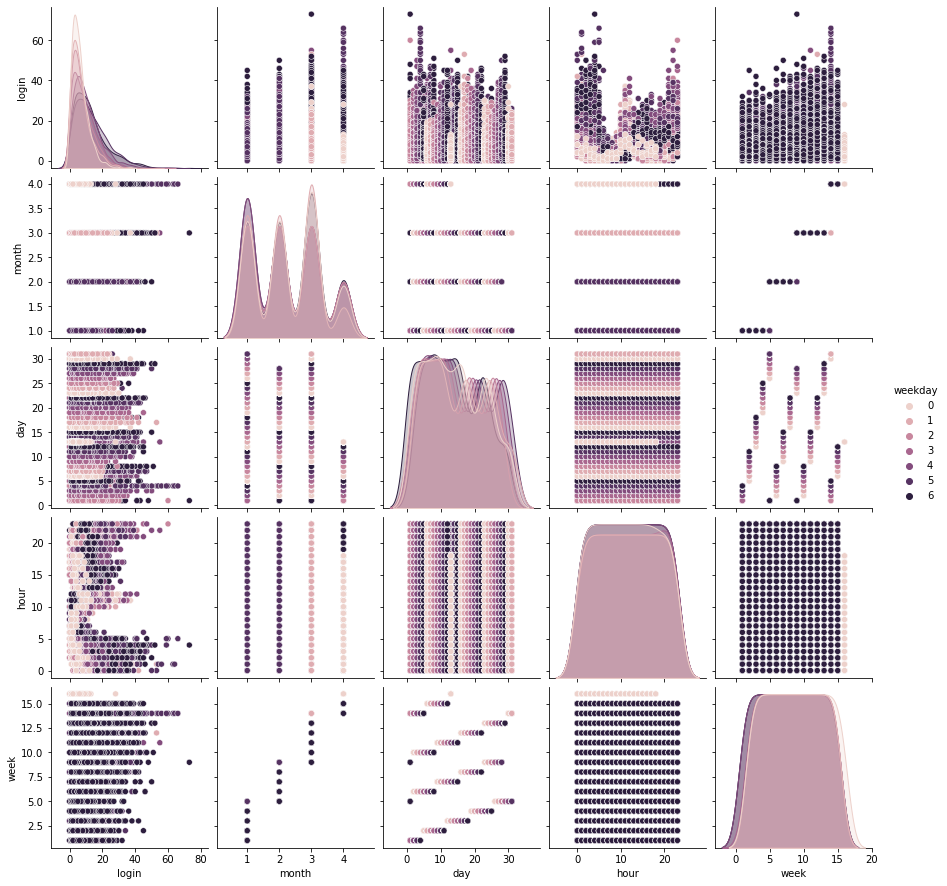

In [48]:
sns.pairplot(rdf, hue = 'weekday')

Text(0.5, 1.0, 'total log-ins seasonality')

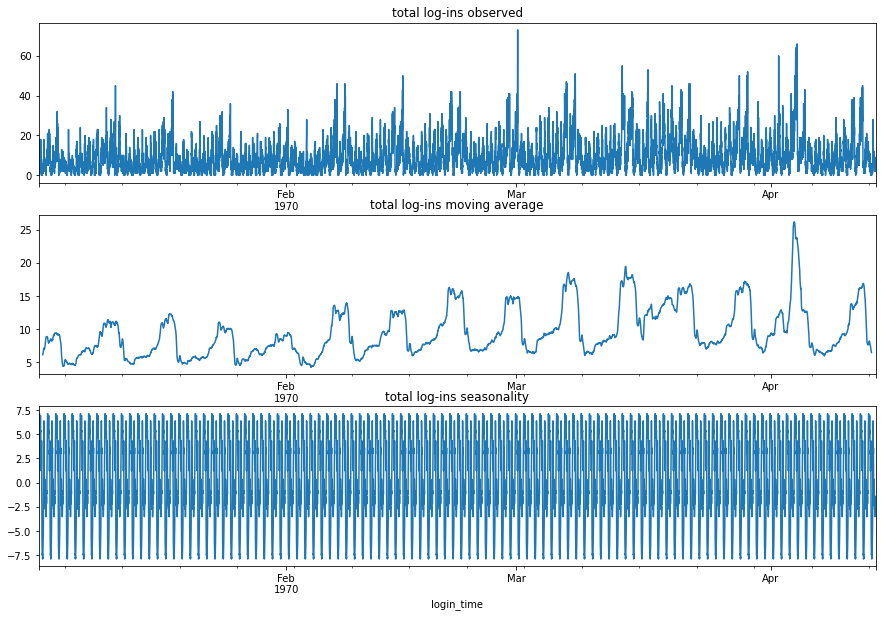

In [9]:
plt.figure(figsize=(15,10))
r = sm.tsa.seasonal.seasonal_decompose(df_15.login, model='additive', freq=96)
plt.subplot(3,1,1)
r.observed.plot()
plt.title('total log-ins observed')
plt.subplot(3,1,2)
r.trend.plot()
plt.title('total log-ins moving average')
plt.subplot(3,1,3)
r.seasonal.plot()
plt.title('total log-ins seasonality')

There is a pattern to the logins over time, but the data as displayed here is hardly interpretable. What is immediately apparent is that there is a weekly trend to the login patters, and that the trend has become exhaggerated upwards over time. In other words, total logins are increasing over all. To get a closer look, check the daily, dayofweek, weekbyweek,monthly patterns of logins by taking the mean across each over time.

In [10]:
daily = df_15.login.groupby(df_15.index.hour).mean()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
months = ['Januyary','February','March','April']
weekly = df_15.login.groupby(df_15.index.weekday).mean()
monthly = df_15.login.groupby(df_15.index.month).mean()
weekbyweek = df_15.login.groupby(df_15.index.week).mean()

In [18]:
daily

login_time
0     14.688725
1     15.482843
2     14.215686
3     11.840686
4     12.338235
5      7.218137
6      2.789216
7      1.997549
8      2.004902
9      3.742647
10     7.509804
11    14.213235
12    12.166667
13     8.850490
14     8.397059
15     7.446078
16     6.941176
17     6.333333
18     7.303922
19     8.007426
20    10.056373
21    13.781863
22    16.193627
23    14.848039
Name: login, dtype: float64

In [11]:
weekly

login_time
0     6.213380
1     6.895833
2     7.692708
3     8.794118
4    10.561111
5    13.456250
6    12.615972
Name: login, dtype: float64

In [12]:
monthly

login_time
1     7.333909
2     9.178943
3    11.331653
4    10.999186
Name: login, dtype: float64

In [13]:
weekbyweek

login_time
1      7.809211
2      7.763393
3      7.474702
4      7.069940
5      7.059524
6      8.291667
7      8.802083
8     10.468750
9      9.752976
10    11.008929
11    10.919643
12    13.325893
13    10.840774
14    12.046131
15     9.659226
16     5.197368
Name: login, dtype: float64

Text(0.5, 1.0, 'average total log-ins by day of week')

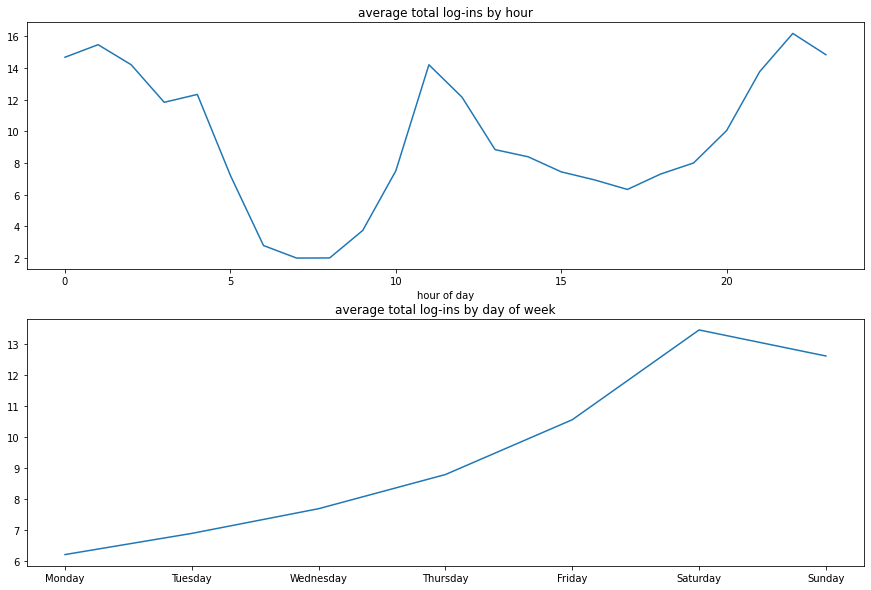

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(daily)
plt.title('average total log-ins by hour')
plt.xlabel('hour of day')
plt.subplot(2,1,2)
plt.plot(weekly.values)
plt.xticks([0,1,2,3,4,5,6], days)
plt.title('average total log-ins by day of week')

Text(0.5, 1.0, 'average total log-ins by month')

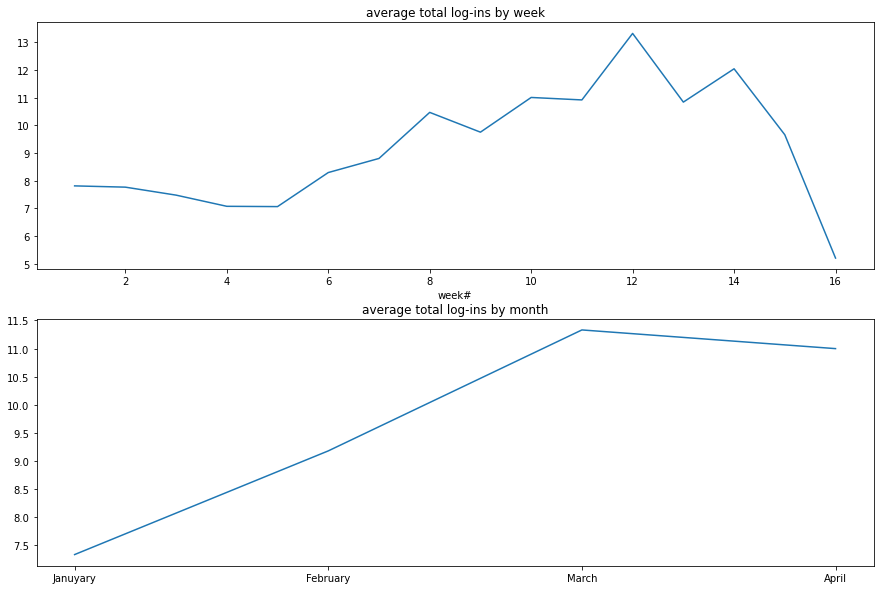

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(weekbyweek)
plt.title('average total log-ins by week')
plt.xlabel('week#')
plt.subplot(2,1,2)
plt.plot(monthly.values)
plt.xticks([0,1,2,3], months)
plt.title('average total log-ins by month')

In [62]:
df_hour = df_15.resample('H').sum()

In [63]:
df_hour['time'] = pd.to_datetime(df_hour.index)
df_hour['hour'] = df_hour.time.dt.hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

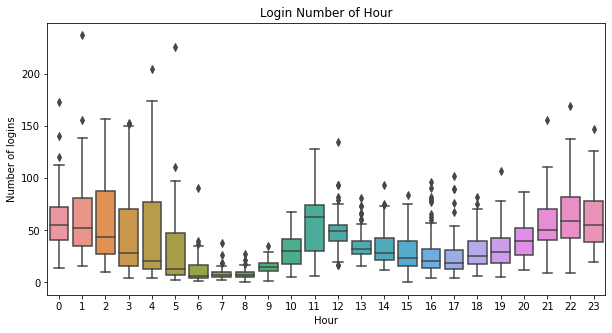

In [61]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='login', data=df_hour)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [64]:
df_day = df_15.resample('D').sum()

In [65]:
df_day['date'] = pd.to_datetime(df_day.index)
df_day['weekday'] = df_day.date.dt.weekday

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

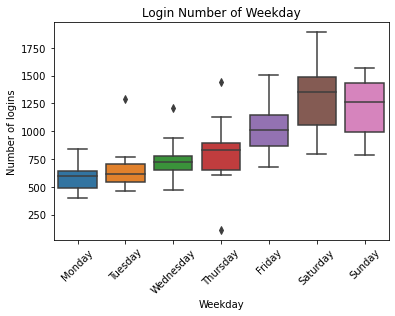

In [56]:
ax = sns.boxplot(x='weekday', y='login', data=df_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Peak activity for logins is between midnight and 4am, 10am to 12pm with a lull in the afternoon and study rise into the evening beginning at 5pm with another peak at 10pm. During the week, activity is lowest at Monday and rises steadily to peak on Saturday, with a slight decline on Sunday and a sharp drop off back on Monday.Regarding week by week, we can see more activity during week 12 and 14. And from a monthly perspective, March and April we the 2 morre active months.

## Part 2 ‑ Experiment and metrics design

1. Key Metric of Success

Exclusivity ratio = (GG)/(GG + GM + MG + MM)

1: Indicates that a driver favors Gotham city exclusively (so 0% for Metropolis), while a ratio of .5 would indicate that a driver favors Gotham city 50% of the time, and a ratio of .25 would indicate that they are equally likely to accept each of the 4 types of trips (A, B, C, and D). The variables must remain constant for the entire experiment.

GG = number of trips that start and end in Gotham city.

GM = number of trips that start in Gotham city and end in Metropolis city.

MG = number of trips that start in Metropolis city and end in Gotham city.

MM = number of trips that start and end in Gotham city.

Additionally, I would recommend to complement this Key Metric of Success with the measure the revenues of taxi and logistics transportation companies for both cities before implementing reimbursement of toll costs, and compare it to the revenue subtracting the reimbursement of toll costs after implementing reimbursement of toll costs.

2. Experimental Design

Implementation

The hypothesis of this experiment is that the exclusivity ratio of drivers will be reduced after the reimbursement program is introduced. Drivers should be subsetted into a testing group and a control group (weighting according to which city drivers are exclusive to must be controlled in order to ensure a representative control group). Next the reimbursement program can be implemented for the testing group. At its conclusion, the exclusivity ratio for the drivers must be calculated again using the same constant variables for the testing and control group.

Testing

To test the null-hypothesis, we must assume that any difference in the mean of the ratio before and the ratio after are due to random chance. Testing the null-hypothesis should be as simple as comparing the before and after ratios of both the testing group and control group with a two-way z-test to compare the means of the group, provided that all results for all groups are normally distributed (in the event that they are not, a non-parametric test should be utilized instead according to the distribution and standard deviation of the samples).

Recommendations

Since it is know that the cities have different circadian rhythms, it would be prudent to take into consideration the time of day of a trip, and apply a weighting system against the exclusivity ratio depending on the time of day and which city. This is because there may be a tendency of a driver to prefer driving during the day or night, which would directly influence which city they serve, especially during the weekdays (since weekends show relatively similar activity, they would be excluded from this weighting system).

## Part 3 ‐ Predictive modeling

## Data Wrangling

In [77]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [79]:
df = pd.read_json('ultimate_data_challenge.json')

In [80]:
df

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   NaN       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   NaN       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  
0                     True         46.2      3.67                   5.0  
1                    False         50.0      8.26                   5.0  
2                    False        100.0      0.77                   5.0  
3                     True         80.0      2.36                   4.9  
4                    False         82.4      3.13                   4.9  
...                    ...          ...       ...                   ...  
49995                False        100.0      5.63                   4.2  
49996                False          0.0      0.00                   4.0  
49997                 True        100.0      3.86                   5.0  
49998                False        100.0      4.58                   3.5  
49999                False          0.0      3.49                   5.0  

[50000 rows x 12 columns]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [82]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)


In [83]:
df.dropna(axis=0, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [85]:
df = df.reset_index(drop=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [87]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [88]:
profile = ProfileReport(df)
profile.to_file(output_file="df.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Users Retained

In [89]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


In [90]:
# Create the target variable -- retained
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1

In [91]:
df

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49599  King's Landing                       0  2014-01-25   
49600         Astapor                       1  2014-01-24   
49601      Winterfell                       0  2014-01-31   
49602         Astapor                       2  2014-01-14   
49603         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                  4.700000       1.10     2014-06-17   iPhone       15.4   
1                  5.000000       1.00     2014-05-05  Android        0.0   
2                  4.300000       1.00     2014-01-07   iPhone        0.0   
3                  4.600000       1.14     2014-06-29   iPhone       20.0   
4                  4.400000       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49599              5.000000       1.00     2014-06-05   iPhone        0.0   
49600              4.601559       1.00     2014-01-25   iPhone        0.0   
49601              5.000000       1.00     2014-05-22  Android        0.0   
49602              3.000000       1.00     2014-01-15   iPhone        0.0   
49603              4.601559       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                     True         46.2      3.67                   5.0   
1                    False         50.0      8.26                   5.0   
2                    False        100.0      0.77                   5.0   
3                     True         80.0      2.36                   4.9   
4                    False         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49599                False        100.0      5.63                   4.2   
49600                False          0.0      0.00                   4.0   
49601                 True        100.0      3.86                   5.0   
49602                False        100.0      4.58                   3.5   
49603                False          0.0      3.49                   5.0   

       retained  
0             1  
1             0  
2             0  
3             1  
4             0  
...         ...  
49599         1  
49600         0  
49601         0  
49602         0  
49603         0  

[49604 rows x 13 columns]

## Exploratory Analysis

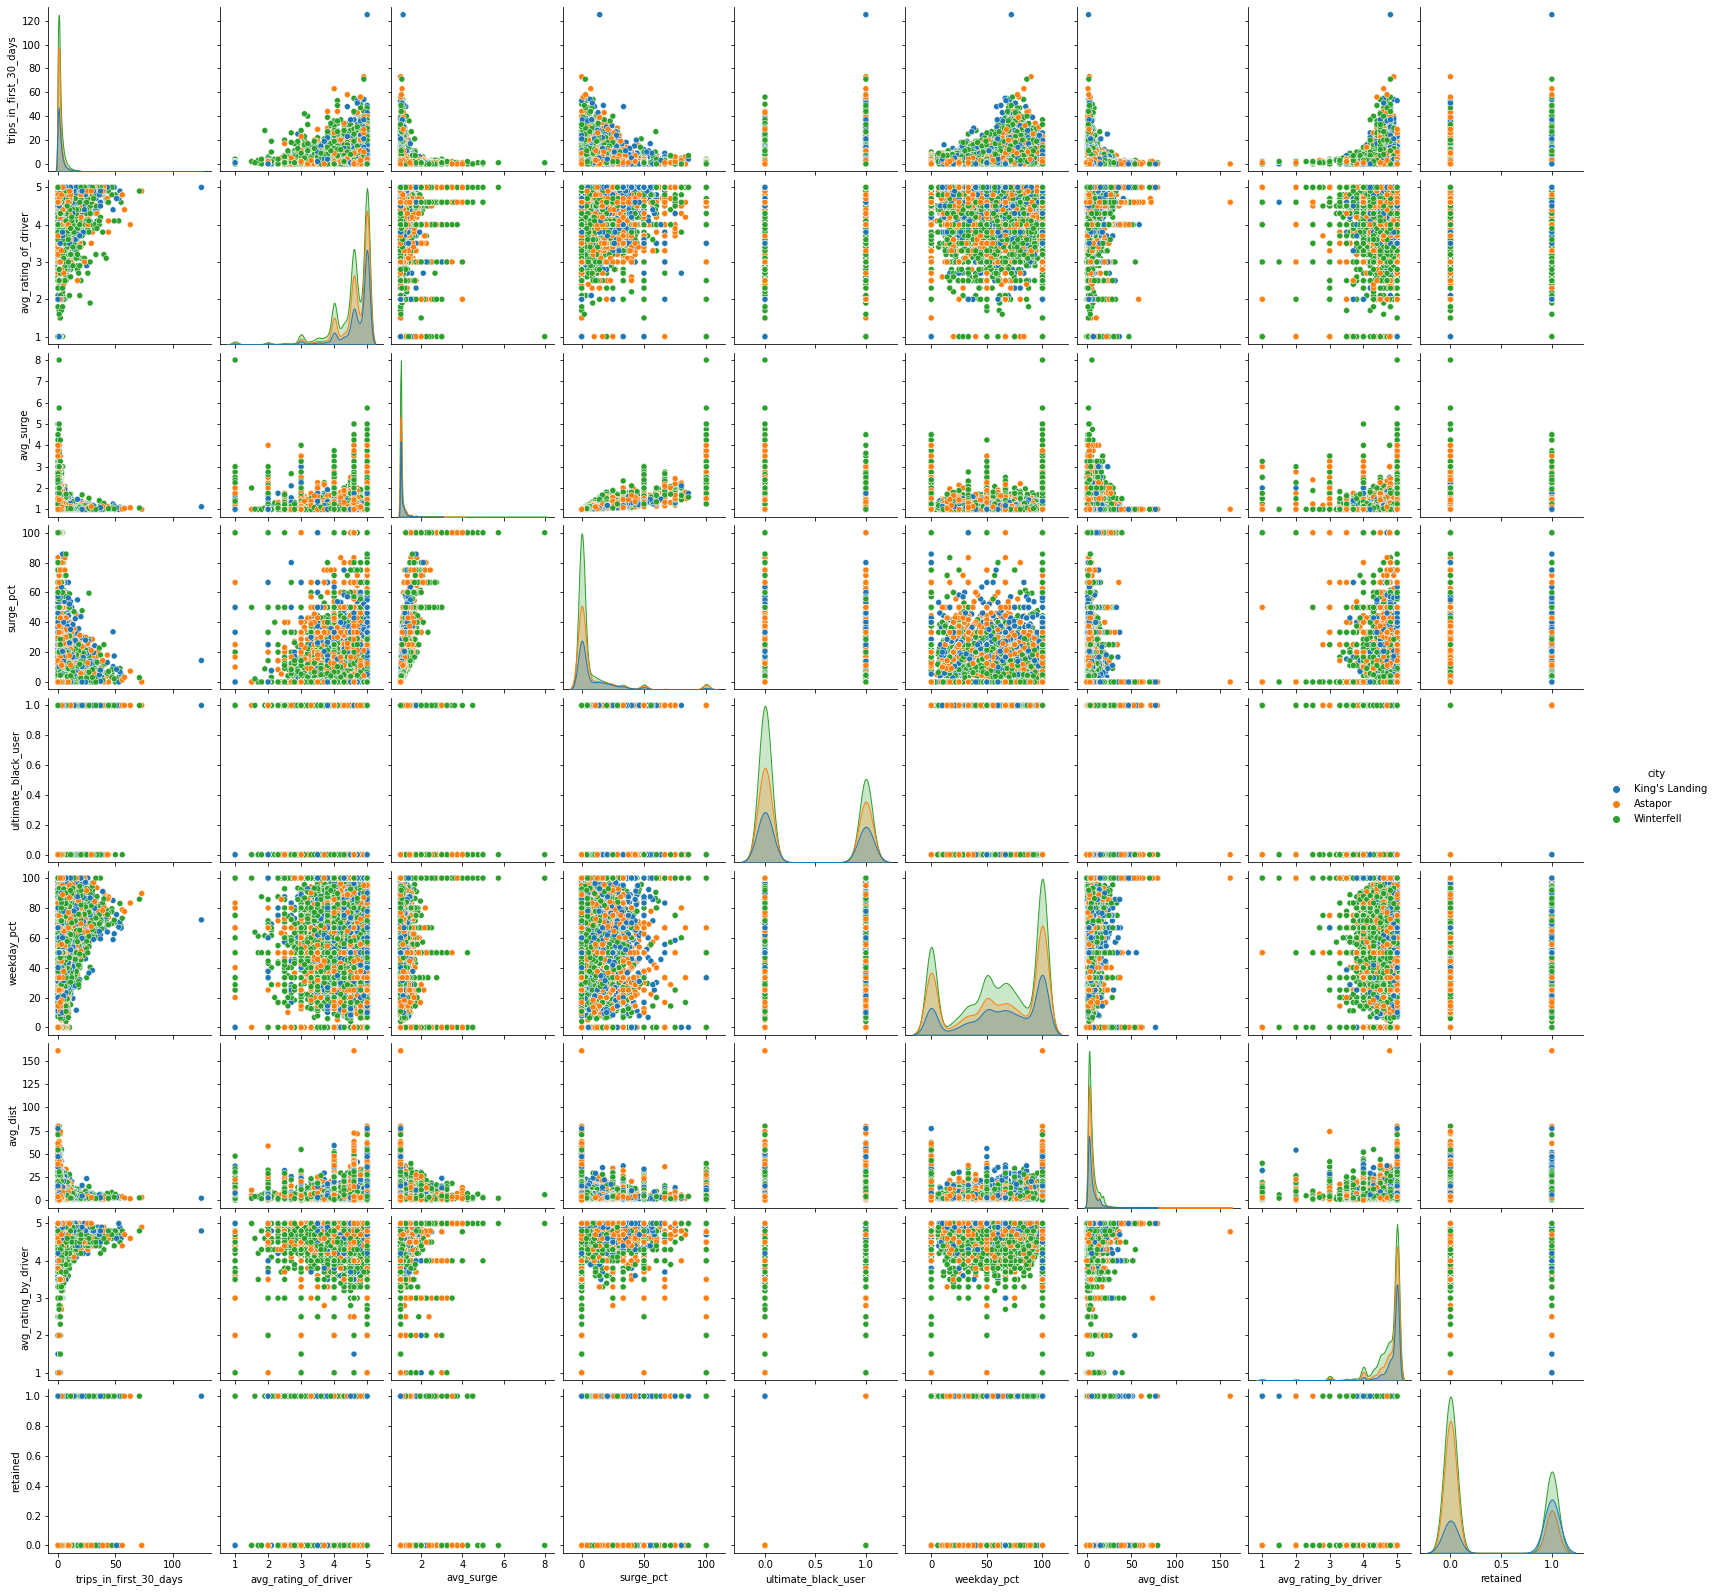

In [92]:
sns.pairplot(df, hue='city')

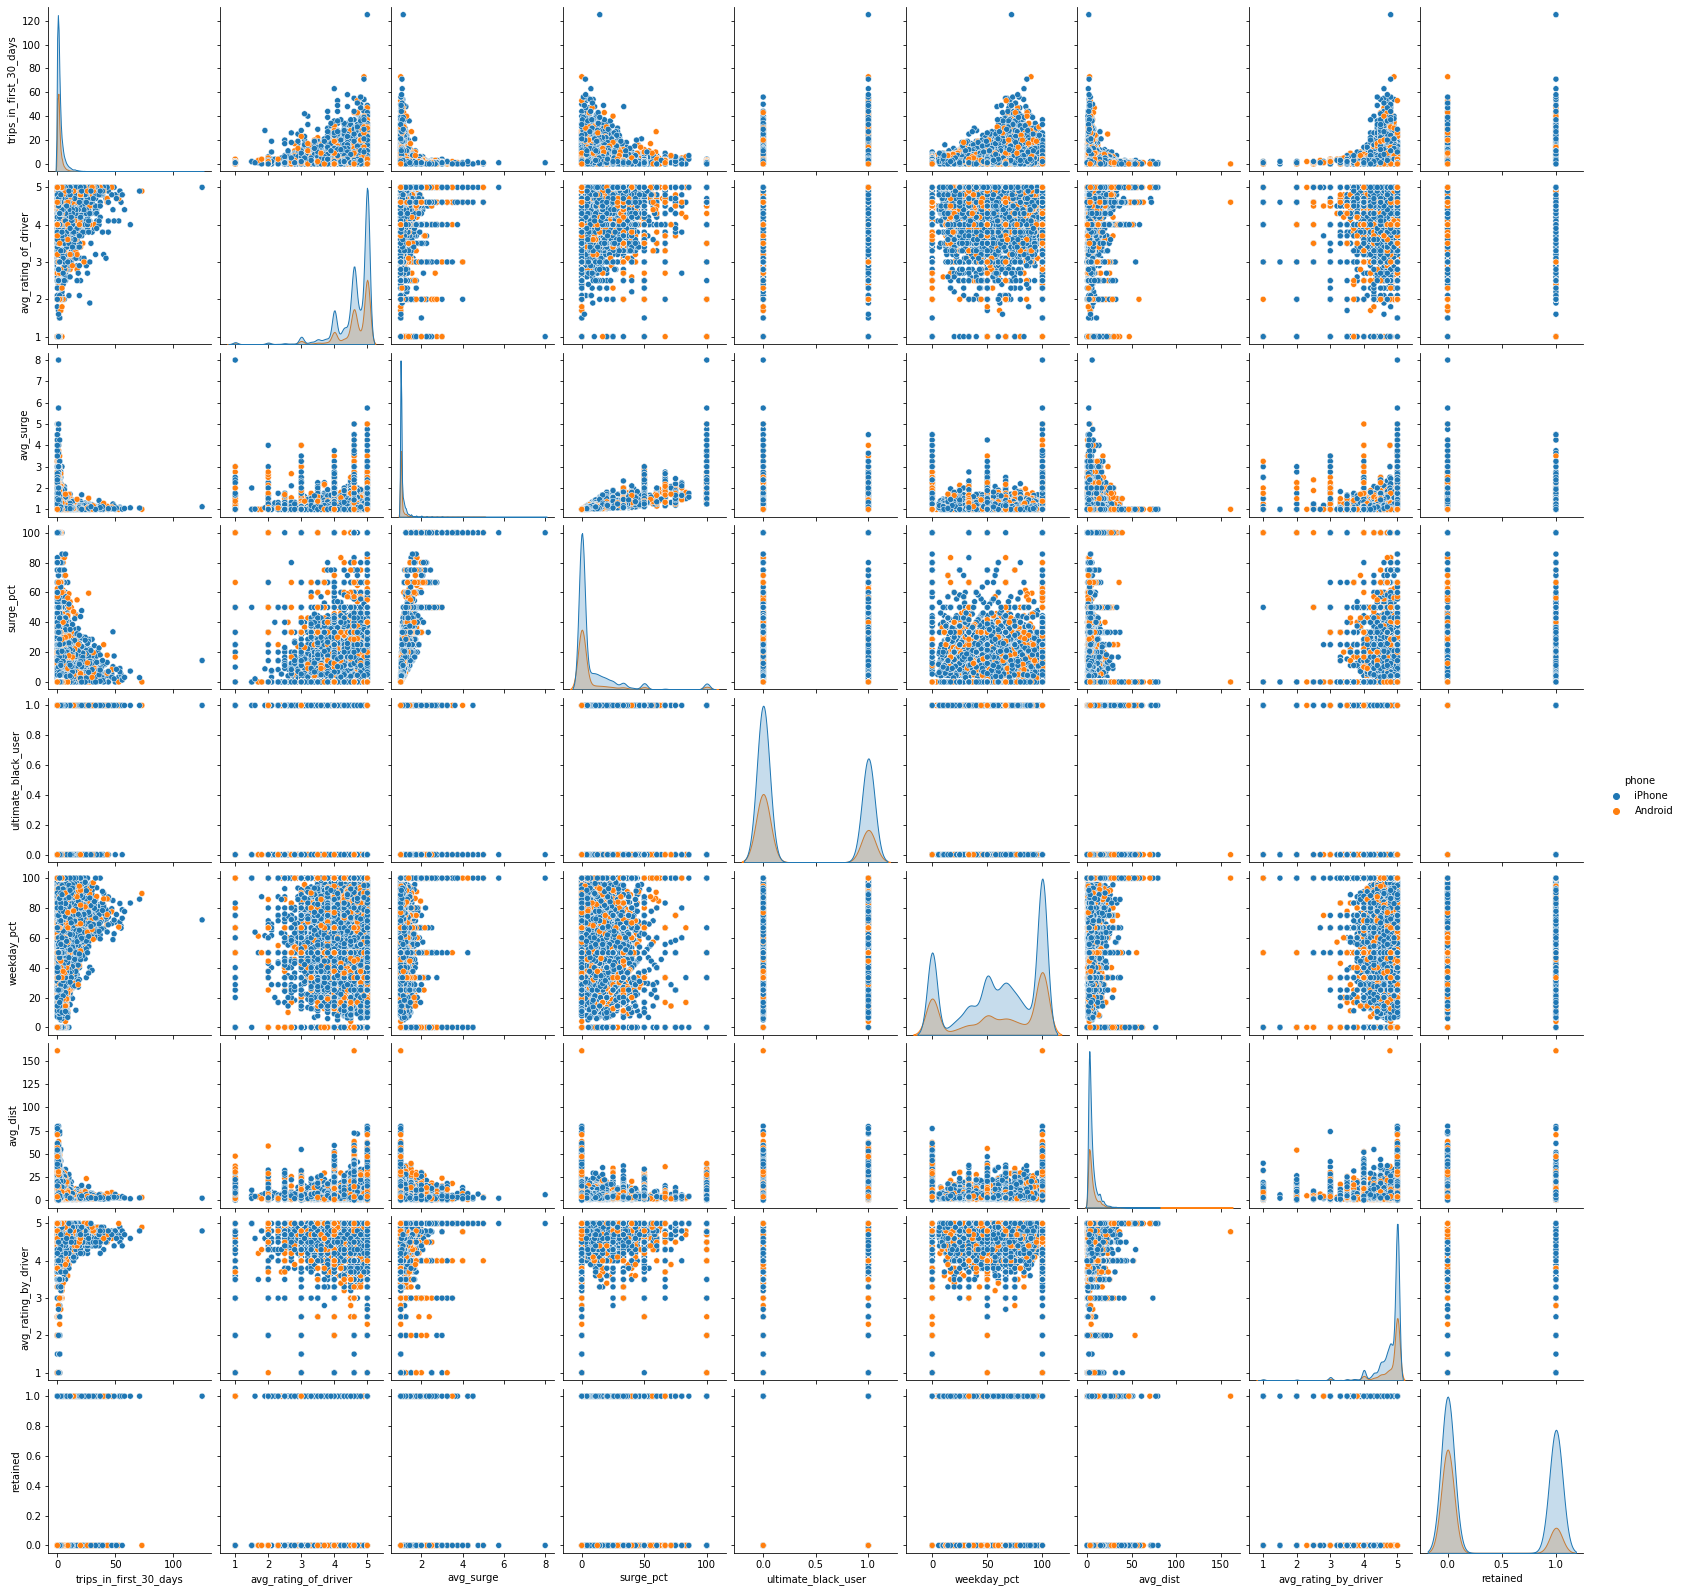

In [93]:
sns.pairplot(df, hue='phone')

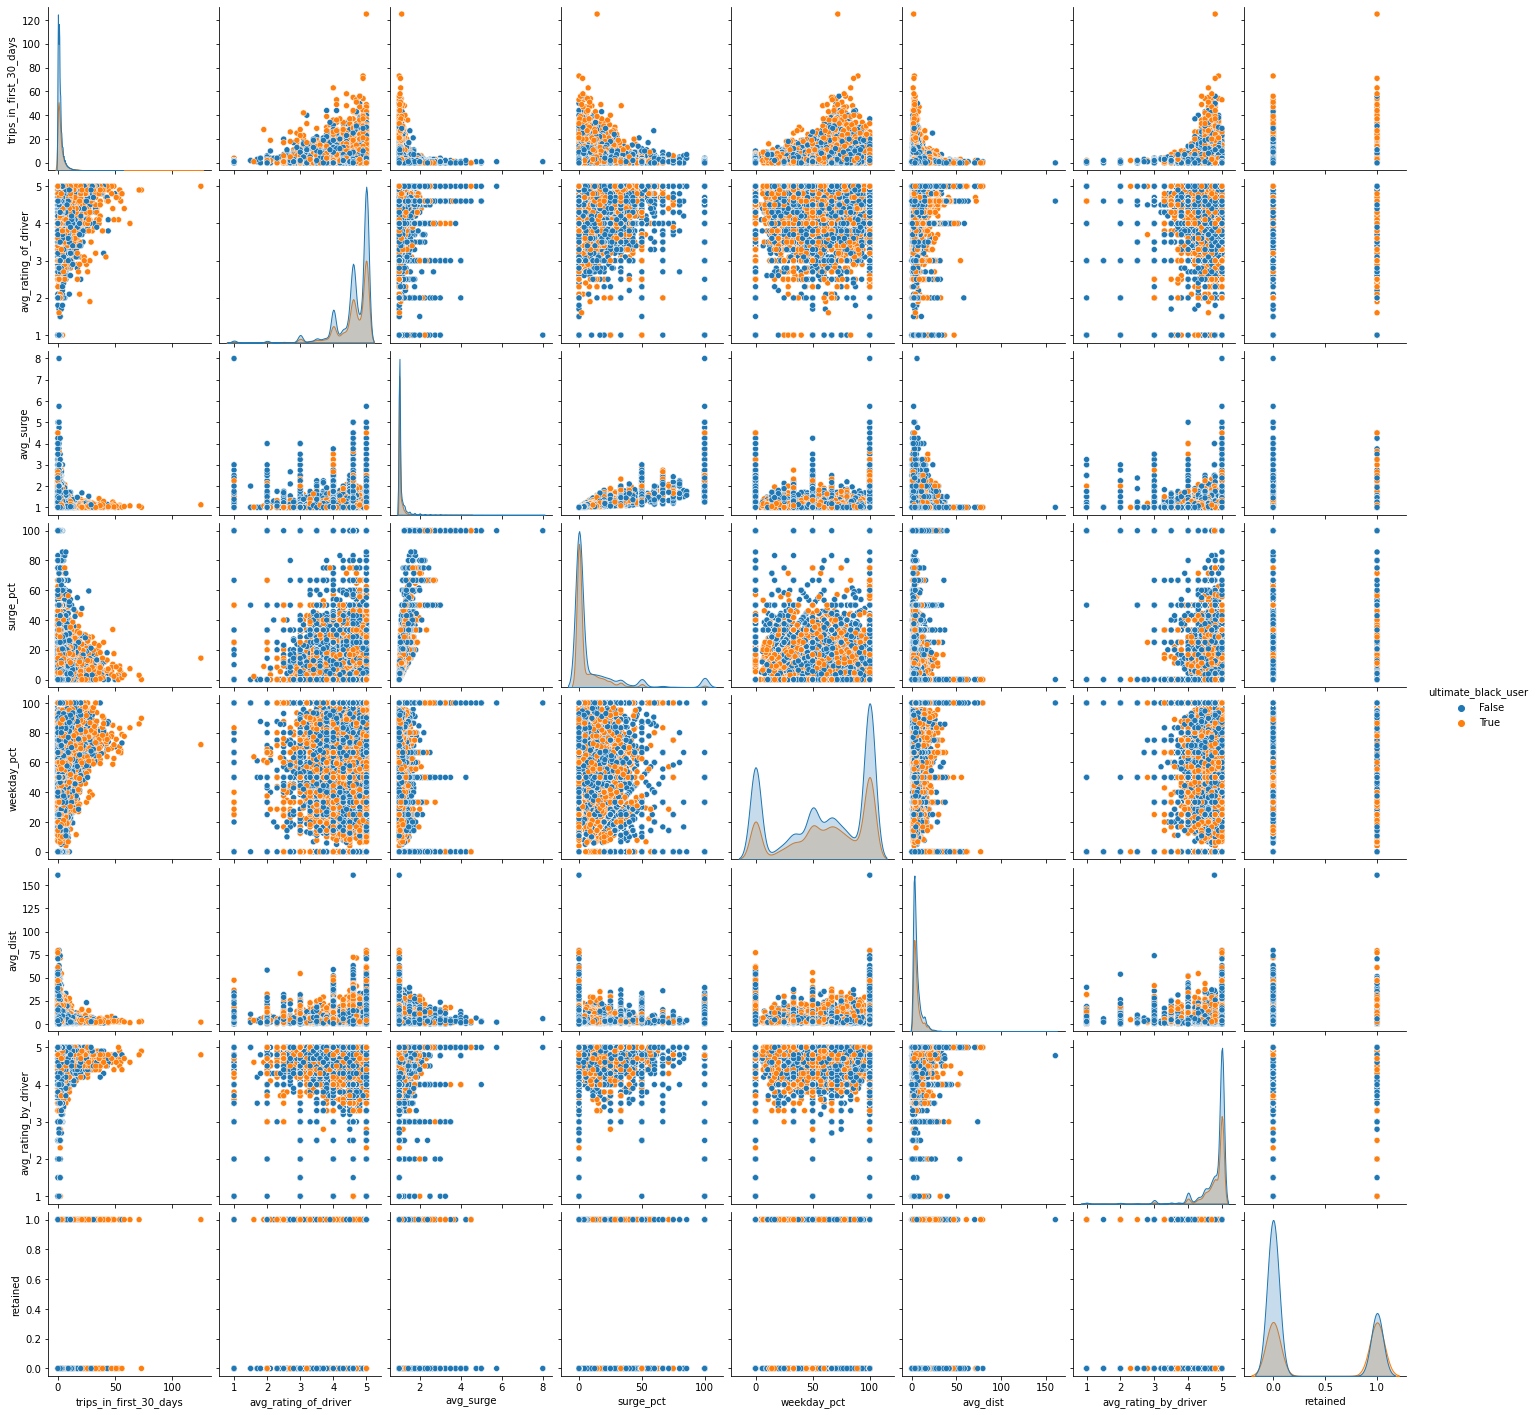

In [94]:
sns.pairplot(df, hue='ultimate_black_user')

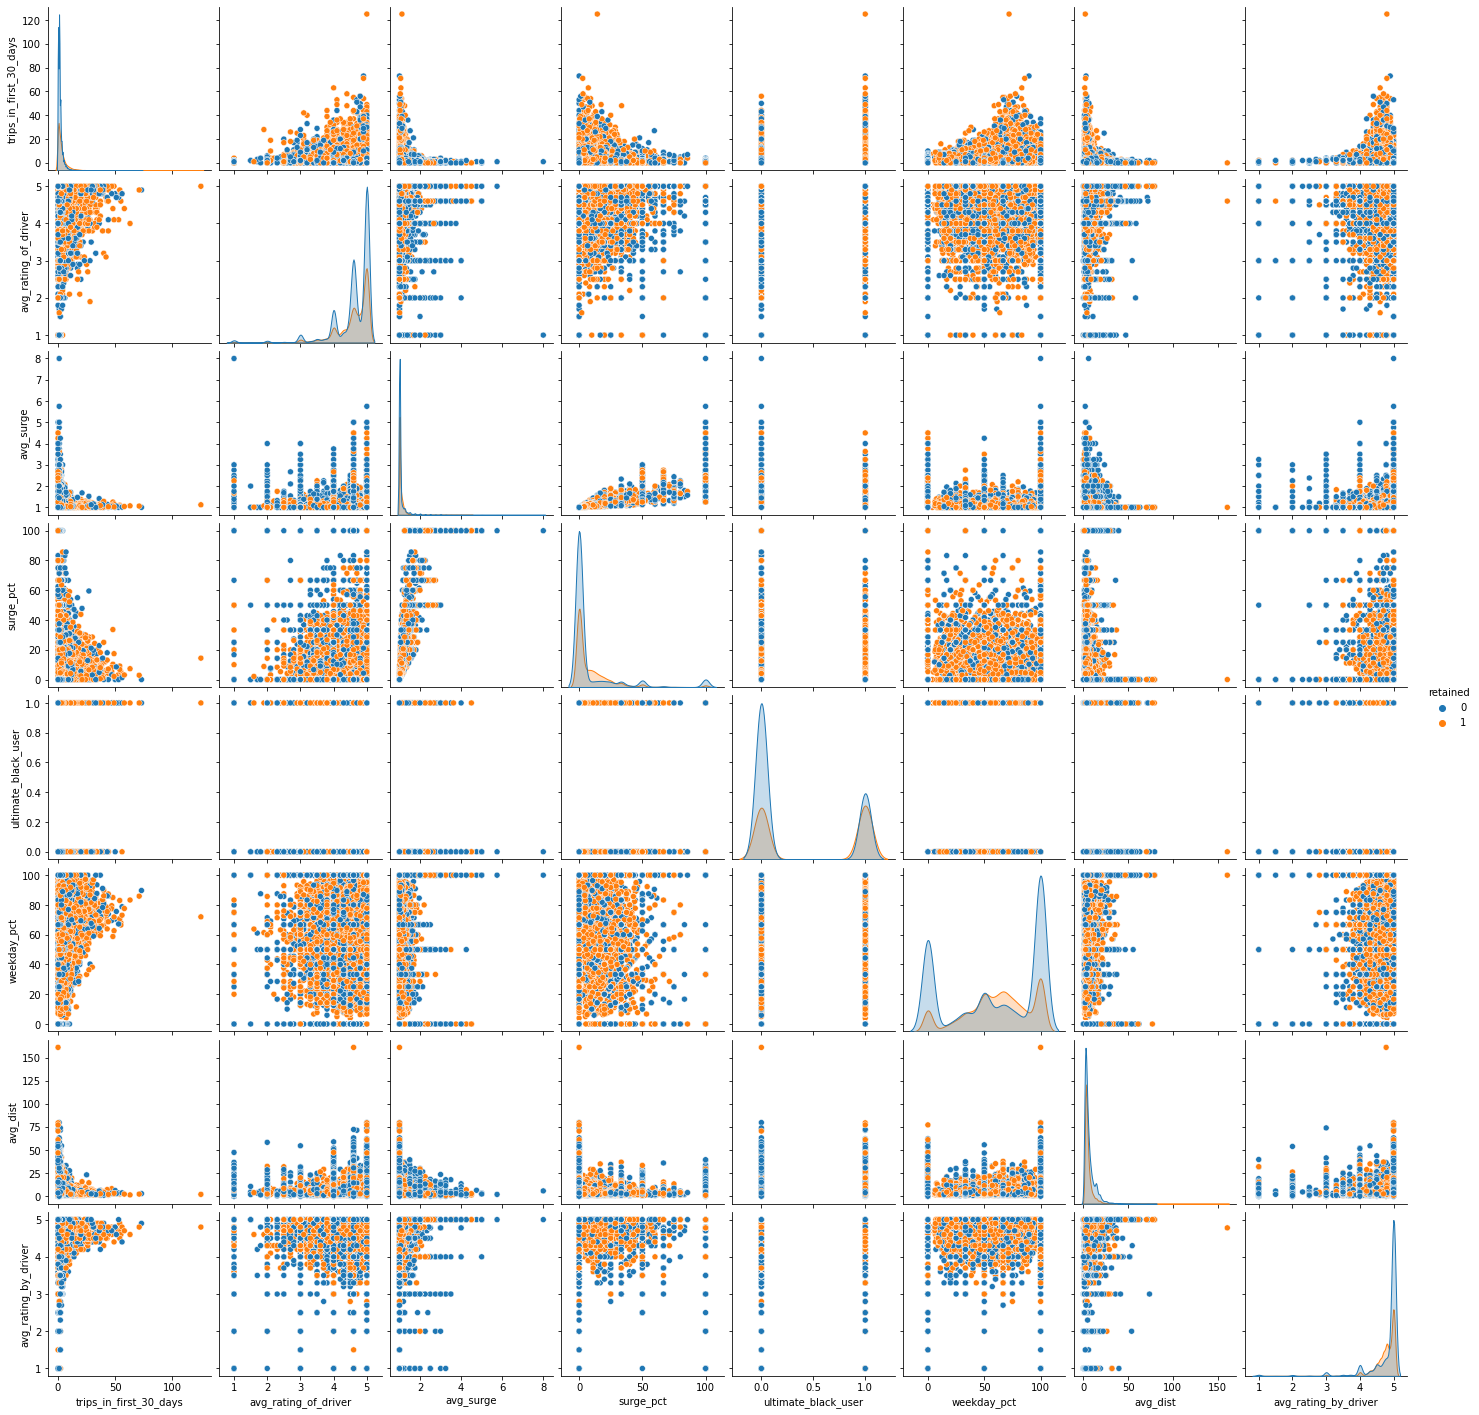

In [95]:
sns.pairplot(df, hue='retained')

## DATA MODELING

## Prepare dataset

In [96]:
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [97]:
df

city  trips_in_first_30_days  avg_rating_of_driver  \
0      King's Landing                       4              4.700000   
1             Astapor                       0              5.000000   
2             Astapor                       3              4.300000   
3      King's Landing                       9              4.600000   
4          Winterfell                      14              4.400000   
...               ...                     ...                   ...   
49599  King's Landing                       0              5.000000   
49600         Astapor                       1              4.601559   
49601      Winterfell                       0              5.000000   
49602         Astapor                       2              3.000000   
49603         Astapor                       0              4.601559   

       avg_surge    phone  surge_pct  ultimate_black_user  weekday_pct  \
0           1.10   iPhone       15.4                 True         46.2   
1           1.00  Android        0.0                False         50.0   
2           1.00   iPhone        0.0                False        100.0   
3           1.14   iPhone       20.0                 True         80.0   
4           1.19  Android       11.8                False         82.4   
...          ...      ...        ...                  ...          ...   
49599       1.00   iPhone        0.0                False        100.0   
49600       1.00   iPhone        0.0                False          0.0   
49601       1.00  Android        0.0                 True        100.0   
49602       1.00   iPhone        0.0                False        100.0   
49603       1.00  Android        0.0                False          0.0   

       avg_dist  avg_rating_by_driver  retained  
0          3.67                   5.0         1  
1          8.26                   5.0         0  
2          0.77                   5.0         0  
3          2.36                   4.9         1  
4          3.13                   4.9         0  
...         ...                   ...       ...  
49599      5.63                   4.2         1  
49600      0.00                   4.0         0  
49601      3.86                   5.0         0  
49602      4.58                   3.5         0  
49603      3.49                   5.0         0  

[49604 rows x 11 columns]

In [98]:
ndf = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [99]:
ndf

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                           4              4.700000       1.10       15.4   
1                           0              5.000000       1.00        0.0   
2                           3              4.300000       1.00        0.0   
3                           9              4.600000       1.14       20.0   
4                          14              4.400000       1.19       11.8   
...                       ...                   ...        ...        ...   
49599                       0              5.000000       1.00        0.0   
49600                       1              4.601559       1.00        0.0   
49601                       0              5.000000       1.00        0.0   
49602                       2              3.000000       1.00        0.0   
49603                       0              4.601559       1.00        0.0   

       weekday_pct  avg_dist  avg_rating_by_driver  retained  \
0             46.2      3.67                   5.0         1   
1             50.0      8.26                   5.0         0   
2            100.0      0.77                   5.0         0   
3             80.0      2.36                   4.9         1   
4             82.4      3.13                   4.9         0   
...            ...       ...                   ...       ...   
49599        100.0      5.63                   4.2         1   
49600          0.0      0.00                   4.0         0   
49601        100.0      3.86                   5.0         0   
49602        100.0      4.58                   3.5         0   
49603          0.0      3.49                   5.0         0   

       city_King's Landing  city_Winterfell  phone_iPhone  \
0                        1                0             1   
1                        0                0             0   
2                        0                0             1   
3                        1                0             1   
4                        0                1             0   
...                    ...              ...           ...   
49599                    1                0             1   
49600                    0                0             1   
49601                    0                1             0   
49602                    0                0             1   
49603                    0                0             0   

       ultimate_black_user_True  
0                             1  
1                             0  
2                             0  
3                             1  
4                             0  
...                         ...  
49599                         0  
49600                         0  
49601                         1  
49602                         0  
49603                         0  

[49604 rows x 12 columns]

In [100]:
profile = ProfileReport(ndf)
profile.to_file(output_file="ndf.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Split data into training and test sets

In [101]:
X = ndf.drop('retained', axis=1)
y = ndf['retained']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


## Machine Learning Model 1: Random Forest Classifier (RFC)

In [103]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.77170215 0.76023687 0.76704044 0.76600302 0.76260081]
Average 5-Fold CV Score: 0.7655166587836877


## RFC: Hyperparameter Tuning

In [104]:
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [105]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [106]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)
# build model    
clf_cv.fit(X_train, y_train)
# predict using model
y_predict = clf_cv.predict(X_test)

In [107]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': 10, 'n_estimators': 200, 'oob_score': False}
Tuned Score: 0.7672050842928384

Test set performance:
Accuracy:  0.7599032355609313
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.65      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



After hyperparameter tuning, we get the best parameters of n_estimators=200, max_features=8, oob_score=True with accuracy of 76.78%.

## RFC: Final Model

In [108]:
rfc = RandomForestClassifier(n_estimators=200, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [109]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6290
           1       0.68      0.66      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 76.10%


In [110]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

0     1
0  5159  1131
1  1240  2391

Text(0.5, 1.0, 'ROC Curve')

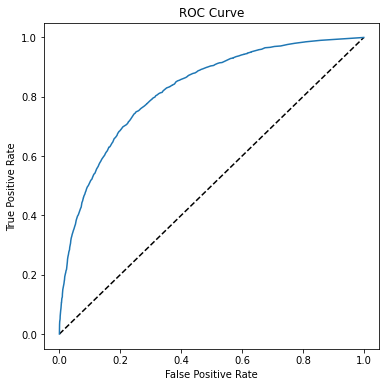

In [111]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [112]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8231


The metrics of final model are:

    Test set accuracy: 75.97%
    AUC: 0.8241

## RFC: Feature Selection

In [113]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False)

features  Importance
5                   avg_dist    0.297212
6       avg_rating_by_driver    0.152785
4                weekday_pct    0.114571
3                  surge_pct    0.083918
1       avg_rating_of_driver    0.080760
0     trips_in_first_30_days    0.068886
7        city_King's Landing    0.067720
2                  avg_surge    0.049112
9               phone_iPhone    0.038461
10  ultimate_black_user_True    0.028591
8            city_Winterfell    0.017984

The 3 most important features:

    avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    avg_rating_by_driver: the rider’s average rating over all of their trips
    weekday_pct: the percent of the user’s trips occurring during a weekday

## Machine Learning Model 2: k-nearest neighbors (KNN)

## KNN: Predictive Modeling

In [114]:
#seperate data and labels
data = ndf.drop('retained', axis=1)
labels = ndf.retained

#split .33 to .67
X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#normalize both sets post-split
X_train = normalize(X_train)
y_train = normalize(y_train)

In [115]:
#lets try the out of the box classifier with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, X_test)

#test the accuracy
knn.score(y_train, y_test)

0.7517409896151497

In [116]:
#specify a parameter grid to search over
parameters = {
    'n_neighbors': [10, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

knn_cv = GridSearchCV(knn, parameters, cv=5) #specify GridSearchCV object

knn_cv.fit(X_train, X_test) #fit to training data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [10, 13, 15],
                         'weights': ['uniform', 'distance']})

In [117]:
#find classifiers best parameters
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [118]:
#check for accuracy improvement
knn_cv.score(y_train, y_test)

0.7646915088576665

## KNN: Model Performance

In [119]:
#predict classifications
y_pred = knn_cv.predict(y_train)

print(classification_report(y_test, y_pred))

# print classification report and confusion matrix
cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     10388
           1       0.71      0.61      0.65      5982

    accuracy                           0.76     16370
   macro avg       0.75      0.73      0.74     16370
weighted avg       0.76      0.76      0.76     16370

confusion matrix:
[[8889 1499]
 [2353 3629]]
Test set accuracy: 76.47%


Based on the matrix above, it is clear that the model is much better at predicting a user who will go inactive over a user who will remain active in their sixth month. This is likely due to the class support and less likely due to the intrinsic value of the data. The reason I say that is because the percision of the 'active' predictions is fairly high, but recall is suffering because the model is failing to notice preditive features of the 'active' class. For a better idea of the overall performace of the model, refer to the ROC curve below.

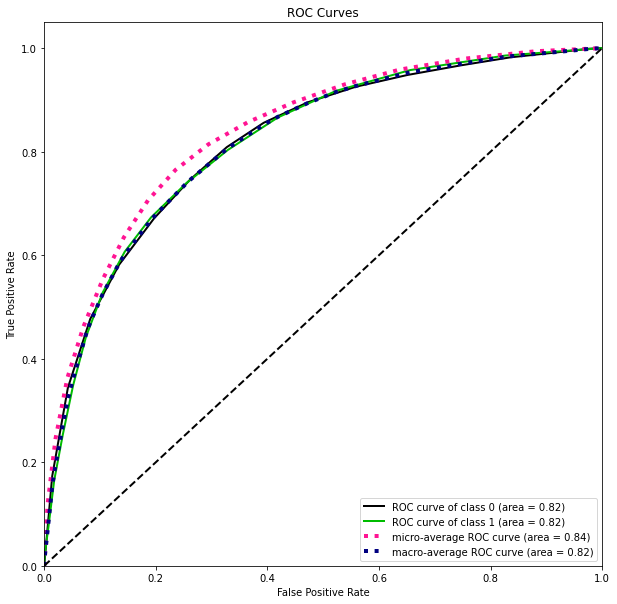

AUC score: 0.731176088269944


In [120]:
#plot roc curve and  print AUV score
y_probas = knn_cv.predict_proba(y_train)
skplt.metrics.plot_roc_curve(y_test, y_probas, figsize=(10,10))
plt.show()
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))

What this curve visualizes, and the AUC score indicates, is that this model is about 25% better than flipping a coin at random in terms of predicting whether users will be active in the 6th month. Again, that is about the odds of rolling a 4-sided dice with 3/4 positive outcomes (or a 1 in 4 chance on average that it will be wrong). Of course that is not to ignore the fact that the f1-score for predicting an active user was merely 66% which is only 16% higher than random guessing.

In [121]:
#instate a new classifier 
#to be used as index for feature number
n_feats = data.shape[1]

#loop over each feature, cross validate and print score
print('Feature  Accuracy')
for i in range(n_feats):
    X = data.iloc[:, i].values.reshape(-1, 1)
    knn_feat_test = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='manhattan')
    scores = cross_val_score(knn_feat_test, X, labels)
    print('%d        %g' % (i, scores.mean()))

Feature  Accuracy
0        0.658637
1        0.685852
2        0.711213
3        0.723813
4        0.716676
5        0.599226
6        0.707463
7        0.663233
8        0.609042
9        0.601404
10        0.631743


3        0.723813  surge_pct
4        0.716676  weekday_pct
2        0.711213  avg_surge
6        0.707463  avg_rating_by_driver

Text(0.5, 1.0, 'weekday_pct for users active @ 6 months')

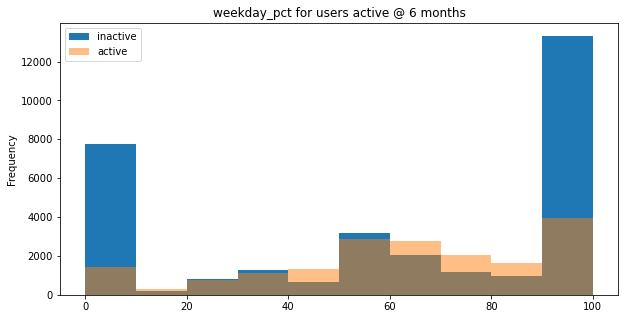

In [122]:
#subset active and inactive users for feature 7
feat_7_active = df.weekday_pct.loc[df['retained'] == 1]
feat_7_inactive = df.weekday_pct.loc[df['retained'] == 0]

plt.figure(figsize=(10,5))

#plot
feat_7_inactive.plot(kind='hist')
feat_7_active.plot(kind='hist', alpha=0.5)
plt.legend(['inactive', 'active'])
plt.title('weekday_pct for users active @ 6 months' )

For both classes retained (or active) and not retained (or inactive), there are users who ride exclusively during the weekdays or during the weekends, but a mix of both was a better marker for users who will be active for 6 months. Since the model recognized users who became inactive for 6 months, it is likely that being an exclusive weekender or exclusive weekdayer is a strong marker of potential user loss.

## HOW TO improve its longterm rider retention

Both models agree on these 3 features as relevant:
surge_pct
weekday_pct
avg_rating_by_driver

Focus on:
    Cautivate riders to increase the rider’s average rating over all of their trips.
    Seduce riders to take more rides during weekdays.
    Reduce the additional surge price for retained/active riders.